# How to make a Z-Score DF From an Event Spikes DF

In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
from matplotlib_venn import venn3

event_spikes = pickle.load(open('event_and_pre_event_spikes_df.pkl', 'rb'))

# Identify 'Pre-event' and 'Event' columns
pre_event_cols = [col for col in event_spikes.columns if col.startswith('Pre-event')]
event_cols = [col for col in event_spikes.columns if col.startswith('Event') and col not in ['Event name', 'Event number']]

# Calculate 'Pre-event M' and 'Pre-event Std' for each row
pre_event_mean = event_spikes[pre_event_cols].mean(axis=1)
pre_event_std = event_spikes[pre_event_cols].std(axis=1).round(3)

# Normalize 'Event' columns based on 'Pre-event M' and 'Pre-event Std'
normalized_event_cols = event_spikes[event_cols].apply(lambda x: (x - pre_event_mean) / pre_event_std, axis=0)
normalized_event_cols = normalized_event_cols.replace([np.inf, -np.inf], np.nan)  # Handle division by zero by replacing infinities with NaN

# Calculate 'Event Z-Score' for each row
event_z_score = normalized_event_cols.mean(axis=1)

# Creating the final DataFrame with the calculated columns at the end
event_spikes_zscores_final = pd.concat([event_spikes, normalized_event_cols, pre_event_mean.rename('Pre-event M'), pre_event_std.rename('Pre-event Std'), event_z_score.rename('Event Z-Score')], axis=1)

event_spikes_zscores_final

,Recording,Event name,Event number,Unit number,Pre-event timebin 1,Pre-event timebin 2,Pre-event timebin 3,Pre-event timebin 4,Pre-event timebin 5,Pre-event timebin 6,...,Event timebin 94,Event timebin 95,Event timebin 96,Event timebin 97,Event timebin 98,Event timebin 99,Event timebin 100,Pre-event M,Pre-event Std,Event Z-Score
0,20230612_101430_standard_comp_to_training_D1_s...,rewarded,1,85,1.28,1.28,1.28,1.28,1.28,1.28,...,-6.787629,-6.787629,-7.200000,-7.200000,-7.200000,-7.200000,-7.200000,1.4184,0.097,-3.942268
1,20230612_101430_standard_comp_to_training_D1_s...,rewarded,2,85,0.12,0.12,0.12,0.12,0.12,0.12,...,5.728571,5.728571,5.728571,5.728571,5.728571,5.728571,5.728571,0.0796,0.028,0.685714
2,20230612_101430_standard_comp_to_training_D1_s...,rewarded,3,85,0.12,0.12,0.12,0.12,0.12,0.12,...,-2.419512,-2.419512,-2.419512,-2.419512,-2.419512,-2.419512,-2.419512,0.2192,0.041,-1.102439
3,20230612_101430_standard_comp_to_training_D1_s...,rewarded,4,85,0.24,0.24,0.24,0.24,0.24,0.24,...,-6.066667,-6.066667,-6.066667,-6.066667,-6.066667,-6.066667,-6.066667,0.2292,0.018,-2.777778
4,20230612_101430_standard_comp_to_training_D1_s...,rewarded,5,85,0.20,0.20,0.20,0.20,0.20,0.20,...,-3.385714,-3.385714,-3.385714,-3.385714,-3.385714,-3.385714,-3.385714,0.1748,0.028,-3.571429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10015,20230625_112913_standard_comp_to_both_rewarded...,both_rewarded,16,11,0.76,0.76,0.76,0.72,0.72,0.72,...,-4.691304,-4.691304,-4.691304,-4.691304,-4.691304,-4.691304,-4.691304,0.8716,0.092,-0.321739
10016,20230625_112913_standard_comp_to_both_rewarded...,both_rewarded,17,11,0.16,0.16,0.16,0.16,0.16,0.16,...,21.556757,21.556757,22.637838,22.637838,22.637838,22.637838,22.637838,0.1624,0.037,6.497297
10017,20230625_112913_standard_comp_to_both_rewarded...,both_rewarded,18,11,0.08,0.08,0.08,0.08,0.08,0.08,...,4.175000,4.175000,4.175000,4.175000,4.175000,4.175000,4.175000,0.1064,0.032,2.000000
10018,20230625_112913_standard_comp_to_both_rewarded...,both_rewarded,19,11,0.04,0.04,0.04,0.04,0.04,0.04,...,3.044706,3.044706,3.044706,3.044706,3.044706,3.044706,3.044706,0.1012,0.085,2.564706


In [2]:
def custom_aggregate(z_scores):
    if len(z_scores) < 2:
        return '< 2 events'
    else:
        return z_scores.mean()

# Group by 'Recording', 'Event name', and 'Unit number', then apply the custom aggregation function
zscore_df = event_spikes_zscores_final.groupby(['Recording', 'Event name', 'Unit number'])['Event Z-Score'].apply(custom_aggregate).reset_index()

# Rename the column from the aggregation result to 'Z-score'
zscore_df.rename(columns={'Event Z-Score': 'Z-score'}, inplace=True)

In [3]:
zscore_df
# This Z-Score DF averages all occurrences of an event from each recording into 1 row per neuron

,Recording,Event name,Unit number,Z-score
0,20230612_101430_standard_comp_to_training_D1_s...,lose,2,-1.539897
1,20230612_101430_standard_comp_to_training_D1_s...,lose,5,0.663624
2,20230612_101430_standard_comp_to_training_D1_s...,lose,13,1.363285
3,20230612_101430_standard_comp_to_training_D1_s...,lose,17,-0.807436
4,20230612_101430_standard_comp_to_training_D1_s...,lose,19,-1.596648
...,...,...,...,...
797,20230625_112913_standard_comp_to_both_rewarded...,win,60,1.927347
798,20230625_112913_standard_comp_to_both_rewarded...,win,77,1.815513
799,20230625_112913_standard_comp_to_both_rewarded...,win,85,2.909794
800,20230625_112913_standard_comp_to_both_rewarded...,win,99,-2.119610


In [4]:
# This is how you can select for a specific category or recordings
omission_df = zscore_df[zscore_df['Recording'].str.contains('omission')]
both_rewarded_df = zscore_df[zscore_df['Recording'].str.contains('both_rewarded')]

### This step decides if each neuron was significant for each event per recording

In [5]:
def categorize_zscore(zscore):
    zscore = float(zscore)  # Make sure Z-score is a float
    if zscore > 3:  # This is the upper z-score cutoff
        return 'excitatory'
    elif zscore < -2:  # This is the lower z-score cutoff (note the negative)
        return 'inhibitory'
    else:
        return 'not significant'

# Apply the function to create the 'Sig' column
zscore_df['Sig'] = zscore_df['Z-score'].apply(categorize_zscore)

In [6]:
zscore_df

,Recording,Event name,Unit number,Z-score,Sig
0,20230612_101430_standard_comp_to_training_D1_s...,lose,2,-1.539897,not significant
1,20230612_101430_standard_comp_to_training_D1_s...,lose,5,0.663624,not significant
2,20230612_101430_standard_comp_to_training_D1_s...,lose,13,1.363285,not significant
3,20230612_101430_standard_comp_to_training_D1_s...,lose,17,-0.807436,not significant
4,20230612_101430_standard_comp_to_training_D1_s...,lose,19,-1.596648,not significant
...,...,...,...,...,...
797,20230625_112913_standard_comp_to_both_rewarded...,win,60,1.927347,not significant
798,20230625_112913_standard_comp_to_both_rewarded...,win,77,1.815513,not significant
799,20230625_112913_standard_comp_to_both_rewarded...,win,85,2.909794,not significant
800,20230625_112913_standard_comp_to_both_rewarded...,win,99,-2.119610,inhibitory


### This step combines all the events for each neuron within each recording to a single row, so you know if each neuron was responsive to more than 1 event

In [7]:
# Initialize lists to store the data
data = []

# Iterate over each group in the DataFrame grouped by 'Recording' and 'Unit number'
for (recording, unit), group in zscore_df.groupby(['Recording', 'Unit number']):
    # Determine significant and insignificant events
    significant_events = ', '.join(group.loc[group['Sig'] != 'not significant', 'Event name'])
    insignificant_events = ', '.join(group.loc[group['Sig'] == 'not significant', 'Event name'])
    
    # Append the data for this group to the list
    data.append({
        'Recording': recording,
        'Unit number': unit,
        'Significant Events': significant_events,
        'Insignificant Events': insignificant_events
    })

# Now create the DataFrame from the list of data
zscore_df = pd.DataFrame(data)

# Display the DataFrame
zscore_df

,Recording,Unit number,Significant Events,Insignificant Events
0,20230612_101430_standard_comp_to_training_D1_s...,2,,"lose, rewarded, win"
1,20230612_101430_standard_comp_to_training_D1_s...,5,rewarded,"lose, win"
2,20230612_101430_standard_comp_to_training_D1_s...,13,rewarded,"lose, win"
3,20230612_101430_standard_comp_to_training_D1_s...,17,,"lose, rewarded, win"
4,20230612_101430_standard_comp_to_training_D1_s...,19,win,"lose, rewarded"
...,...,...,...,...
279,20230625_112913_standard_comp_to_both_rewarded...,60,lose,"both_rewarded, win"
280,20230625_112913_standard_comp_to_both_rewarded...,77,,"both_rewarded, lose, win"
281,20230625_112913_standard_comp_to_both_rewarded...,85,both_rewarded,"lose, win"
282,20230625_112913_standard_comp_to_both_rewarded...,99,"both_rewarded, win",lose


In [ ]:
pickle.dump(zscore_df, open("zscore_df.pkl", "wb"))

## This is where you would split up the df into different category of recordings

### Below is an example of how to make a Venn Diagram based on 'Omission' trials (aka Alone Rewarded trials)

In [8]:
# This is how you can select for a specific category of recordings
omission_z_df = zscore_df[zscore_df['Recording'].str.contains('omission')]

In [9]:
omission_sig_events_counts = omission_z_df['Significant Events'].value_counts()

# Rename the empty strings to 'non-specific'
omission_sig_events_counts = omission_sig_events_counts.rename(index={'': 'non-responsive'})

omission_sig_events_counts

Significant Events
non-responsive                   60
win                              25
lose                             11
rewarded                         11
omission                          8
lose, win                         7
lose, rewarded, win               7
rewarded, win                     6
omission, rewarded                3
omission, win                     2
lose, omission, rewarded, win     2
lose, rewarded                    1
lose, omission, win               1
Name: count, dtype: int64

In [10]:
venn_data = {
    'Win Only': omission_z_df[(omission_z_df['Significant Events'].str.contains('win') & ~omission_z_df['Significant Events'].str.contains('lose') & ~omission_z_df['Significant Events'].str.contains('rewarded'))].shape[0],
    'Lose Only': omission_z_df[(omission_z_df['Significant Events'].str.contains('lose') & ~omission_z_df['Significant Events'].str.contains('win') & ~omission_z_df['Significant Events'].str.contains('rewarded'))].shape[0],
    'Win & Lose': omission_z_df[(omission_z_df['Significant Events'].str.contains('win') & omission_z_df['Significant Events'].str.contains('lose') & ~omission_z_df['Significant Events'].str.contains('rewarded'))].shape[0],
    'Rewarded Only': omission_z_df[(omission_z_df['Significant Events'].str.contains('rewarded') & ~omission_z_df['Significant Events'].str.contains('win') & ~omission_z_df['Significant Events'].str.contains('lose'))].shape[0],
    'Win & Rewarded': omission_z_df[(omission_z_df['Significant Events'].str.contains('win') & omission_z_df['Significant Events'].str.contains('rewarded') & ~omission_z_df['Significant Events'].str.contains('lose'))].shape[0],
    'Lose & Rewarded': omission_z_df[(omission_z_df['Significant Events'].str.contains('lose') & omission_z_df['Significant Events'].str.contains('rewarded') & ~omission_z_df['Significant Events'].str.contains('win'))].shape[0],
    'Win, Lose, & Rewarded': omission_z_df[(omission_z_df['Significant Events'].str.contains('win') & omission_z_df['Significant Events'].str.contains('lose') & omission_z_df['Significant Events'].str.contains('rewarded'))].shape[0]
}

In [11]:
venn_data

{'Win Only': 27,
 'Lose Only': 11,
 'Win & Lose': 8,
 'Rewarded Only': 14,
 'Win & Rewarded': 6,
 'Lose & Rewarded': 1,
 'Win, Lose, & Rewarded': 9}

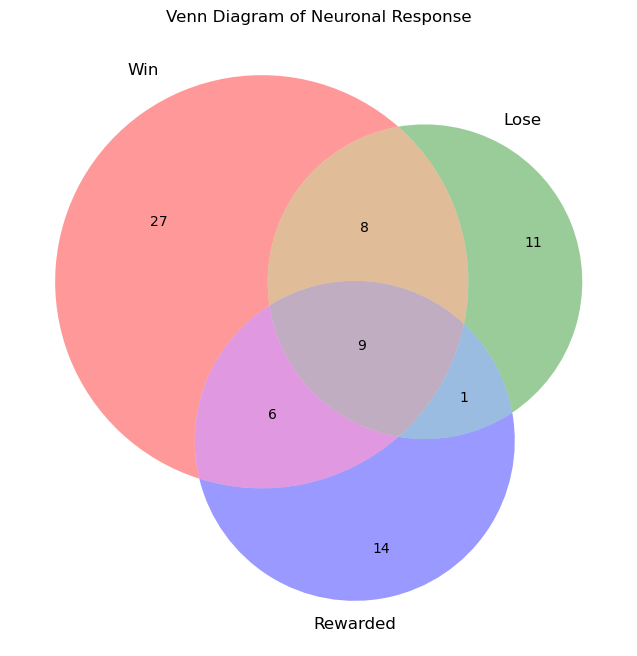

In [12]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn3

# Define subsets for the Venn diagram (must be in a specific order)
# Order: (Abc, aBc, ABc, abC, AbC, aBC, ABC)
# Where A = Win, B = Lose, C = Rewarded
subsets = (
    venn_data['Win Only'],             # Win only
    venn_data['Lose Only'],            # Lose only
    venn_data['Win & Lose'],           # Win & Lose
    venn_data['Rewarded Only'],        # Rewarded only
    venn_data['Win & Rewarded'],       # Win & Rewarded
    venn_data['Lose & Rewarded'],      # Lose & Rewarded
    venn_data['Win, Lose, & Rewarded'] # Win, Lose & Rewarded
)

# Create the Venn diagram
plt.figure(figsize=(8, 8))
venn = venn3(subsets=subsets, set_labels=('Win', 'Lose', 'Rewarded'))

# Display the plot
plt.title('Venn Diagram of Neuronal Response')
plt.show()
# plt.savefig('Win_Lose_Reward_Z_Venn.png', bbox_inches='tight')